<h1>Protótipo Modelagem</h1>

In [35]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Definindo a exibição sem notação científica
pd.set_option('display.float_format', '{:.10f}'.format)
pd.set_option('display.max_rows', 100)

In [36]:
df = pd.read_csv('storage/processed/dados_mode.csv', sep=',')

df.head()

,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_50,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,...,leads_finalidade_residencial,leads_imovel_apartamento,leads_imovel_casa,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj
0,72.0400000000,157.9100000000,2.0000000000,79.0000000000,615.0000000000,13893.1700000000,10104.5600000000,4612.0000000000,6446.0000000000,13209.0000000000,...,20.0000000000,17.0000000000,3.0000000000,9.0000000000,6.0000000000,1.0000000000,9.0000000000,24.0000000000,1754.0000000000,17.0000000000
1,147.4500000000,462.8600000000,0.0000000000,17.0000000000,1542.0000000000,11569.3300000000,17968.0800000000,841.0000000000,841.0000000000,1554.0000000000,...,6.0000000000,6.0000000000,0.0000000000,4.0000000000,1.0000000000,1.0000000000,8.0000000000,11.0000000000,1643.0000000000,17.0000000000
2,8.6000000000,9.7100000000,7.0000000000,13.0000000000,23.0000000000,20898.6700000000,10081.9400000000,13209.0000000000,13209.0000000000,17174.0000000000,...,0.0000000000,0.0000000000,0.0000000000,1.0000000000,3.0000000000,1.0000000000,4.0000000000,5.0000000000,63.0000000000,17.0000000000
3,172.2000000000,295.9700000000,34.0000000000,273.0000000000,912.0000000000,8651.1700000000,5820.7600000000,1554.0000000000,4612.0000000000,9605.0000000000,...,8.0000000000,0.0000000000,8.0000000000,3.0000000000,2.0000000000,1.0000000000,5.0000000000,10.0000000000,1742.0000000000,17.0000000000
4,0.6700000000,1.1500000000,0.0000000000,2.0000000000,2.0000000000,32313.0000000000,9489.0733293839,32313.0000000000,32313.0000000000,32313.0000000000,...,3.0000000000,0.0000000000,3.0000000000,1.0000000000,2.0000000000,1.0000000000,1.0000000000,3.0000000000,19.0000000000,17.0000000000


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
leads_tempo_desde_evento_anterior_mean,5000.0000000000,122.3953620000,277.2355483428,0.0000000000,0.2375000000,37.3700000000,143.4950000000,11008.7800000000
leads_tempo_desde_evento_anterior_std,5000.0000000000,287.5870084594,730.7027677606,0.0000000000,63.6350000000,243.9700000000,287.5870084594,32369.0100000000
leads_tempo_desde_evento_anterior_50,5000.0000000000,86.8946000000,324.0065053883,0.0000000000,0.0000000000,1.0000000000,15.0000000000,7069.0000000000
leads_tempo_desde_evento_anterior_75,5000.0000000000,213.2144000000,479.9662241741,0.0000000000,0.0000000000,17.0000000000,168.0000000000,7069.0000000000
leads_tempo_desde_evento_anterior_max,5000.0000000000,664.9088000000,3773.3686279295,0.0000000000,1.0000000000,233.0000000000,807.2500000000,97323.0000000000
leads_score_midia_mean,5000.0000000000,11675.7595040000,7605.2641845665,0.0000000000,6702.3225000000,11398.9350000000,15931.5725000000,37444.0000000000
leads_score_midia_std,5000.0000000000,9489.0733293839,3952.1838813959,0.0000000000,7585.8400000000,9489.0733293839,11091.1300000000,26471.9600000000
leads_score_midia_min,5000.0000000000,6166.2292000000,8260.3825495821,0.0000000000,568.0000000000,1554.0000000000,13209.0000000000,37444.0000000000
leads_score_midia_25,5000.0000000000,7175.2046000000,8008.1507958937,0.0000000000,1554.0000000000,4612.0000000000,13209.0000000000,37444.0000000000
leads_score_midia_50,5000.0000000000,12314.1484000000,9075.1008362783,0.0000000000,5753.0000000000,13209.0000000000,17174.0000000000,37444.0000000000


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_padronizado = scaler.fit_transform(df)

df_padronizado = pd.DataFrame(df_padronizado)

df_padronizado

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-0.1816520233,-0.1774866387,-0.2620413150,-0.2796609776,-0.0132279129,0.2915917470,0.1557488839,-0.1881734456,-0.0910669080,0.0986150033,...,0.0313269628,0.0518642043,-0.0085508233,0.0072868674,0.1023757140,-0.0154556685,0.0726485974,0.0079859651,0.1819155501,-1.5188411065
1,0.0903821461,0.2398930580,-0.2682146479,-0.4088496534,0.2324657379,-0.0139955886,2.1456123887,-0.6447354915,-0.7910488048,-1.1857966948,...,-0.0193732915,-0.0030143281,-0.0403777088,-0.0097576391,-0.1164319162,-0.0154556685,0.0478097717,-0.0178791866,0.1551943955,-1.5188411065
2,-0.4105055933,-0.3803253698,-0.2466079826,-0.4171844066,-0.1701325960,1.2128221586,0.1500248936,0.8526814758,0.7535321229,0.5355684466,...,-0.0411019719,-0.0329480731,-0.0403777088,-0.0199843431,-0.0289088641,-0.0154556685,-0.0515455311,-0.0298169489,-0.2251607778,-1.5188411065
3,0.1796653406,0.0114736529,-0.1632679881,0.1245745564,0.0654894703,-0.3977366118,-0.9282665802,-0.5584112436,-0.3201064795,-0.2985552893,...,-0.0121303980,-0.0329480731,0.0444939860,-0.0131665404,-0.0726703901,-0.0154556685,-0.0267067054,-0.0198688137,0.1790267766,-1.5188411065
4,-0.4391122895,-0.3920412911,-0.2682146479,-0.4401049782,-0.1756984716,2.7138182223,0.0000000000,3.1656386024,3.1393401795,2.2039261212,...,-0.0302376317,-0.0329480731,-0.0085508233,-0.0199843431,-0.0726703901,-0.0154556685,-0.1260620081,-0.0337962030,-0.2357529472,-1.5188411065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.3523182023,-0.3235113635,-0.2682146479,-0.4151007183,-0.1335568422,0.2786494164,1.1697960311,-0.5584112436,-0.3793020940,0.5355684466,...,-0.0048875045,-0.0229701581,0.0444939860,-0.0233932444,0.1898987661,-0.0154556685,-0.0515455311,-0.0178791866,-0.1695518885,0.6583967182
4996,0.0549213865,-0.0710442087,-0.2589546485,-0.1463049251,-0.0156132882,-0.1547608579,0.2761778954,-0.6839627794,-0.3201064795,-0.2721066572,...,-0.0121303980,0.0069635869,-0.0403777088,-0.0165754418,0.0148526619,1.4156247451,-0.0018678797,-0.0138999325,0.1953964930,0.6583967182
4997,0.0430530346,-0.1491822867,-0.0644946611,0.2579306088,-0.0869095040,-0.2829151791,-0.4236393898,-0.5584112436,-0.7020056125,-0.2721066572,...,-0.0338590784,-0.0329480731,-0.0297687470,-0.0233932444,-0.1601934422,-0.0154556685,-0.0763843568,-0.0337962030,-0.1387383049,0.6583967182
4998,-0.4336290388,-0.3875656996,-0.2682146479,-0.4380212898,-0.1717228462,-0.0014148858,-0.7761860783,-0.1881734456,-0.3201064795,0.0986150033,...,0.0168411759,0.0019746294,0.0444939860,-0.0063487378,0.1898987661,-0.0154556685,0.0974874231,-0.0079310514,-0.2268458957,0.6583967182


In [39]:
matriz_corr = df_padronizado.corr();matriz_corr

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.0000000000,0.8540153840,0.5831825895,0.6845357592,0.5352624743,0.0044561533,-0.0081833866,-0.1007569515,-0.0980999371,0.0432565003,...,-0.0106000292,-0.0094277104,-0.0103225298,-0.0075831456,-0.0295314007,-0.0004110570,-0.0130665115,-0.0099706849,0.5099398829,0.0076485453
1,0.8540153840,1.0000000000,0.2632266333,0.3323934655,0.7976827400,-0.0035009694,0.0078322300,-0.0308429165,-0.0325015119,0.0007407962,...,0.0035622249,0.0032763619,0.0028641281,0.0028899959,0.0091236218,-0.0096641041,0.0217862225,0.0083018583,0.7478427149,0.0266590586
2,0.5831825895,0.2632266333,1.0000000000,0.6991473355,0.0657690273,-0.0039850622,-0.0302041028,-0.0264213676,-0.0480311750,0.0878845739,...,-0.0094877523,-0.0077979006,-0.0092777302,-0.0057331792,-0.0346786720,-0.0298415676,-0.0243283294,-0.0088945591,0.0563483445,0.0253327558
3,0.6845357592,0.3323934655,0.6991473355,1.0000000000,0.1049099660,0.0011810692,-0.0559243653,-0.0679507423,-0.0837155596,0.0776012542,...,-0.0140731981,-0.0117751178,-0.0136640363,-0.0088847333,-0.0483560480,-0.0080312663,-0.0304470476,-0.0132544901,0.1019221345,0.0142843633
4,0.5352624743,0.7976827400,0.0657690273,0.1049099660,1.0000000000,-0.0159001467,0.0111973315,-0.0710892364,-0.0615110665,-0.0311750882,...,0.1961339493,0.1866019175,0.1829907463,0.1610959847,0.4072136058,0.2852590167,0.4243519752,0.2576022556,0.9811047993,-0.0154685107
5,0.0044561533,-0.0035009694,-0.0039850622,0.0011810692,-0.0159001467,1.0000000000,0.3206384204,0.7968196690,0.8429977002,0.8968556009,...,-0.0212498705,-0.0198001314,-0.0205516354,-0.0178607007,-0.0357153478,-0.0310178107,-0.0406769023,-0.0249203722,-0.0228651637,-0.0176773973
6,-0.0081833866,0.0078322300,-0.0302041028,-0.0559243653,0.0111973315,0.3206384204,1.0000000000,-0.0758888846,-0.0359629177,0.3460272630,...,-0.0098414661,-0.0107047641,-0.0090761198,-0.0107546860,0.0000953797,-0.0013743229,-0.0077351373,-0.0131064151,0.0190952365,-0.0034002977
7,-0.1007569515,-0.0308429165,-0.0264213676,-0.0679507423,-0.0710892364,0.7968196690,-0.0758888846,1.0000000000,0.9644122376,0.6864105295,...,-0.0225709047,-0.0186222037,-0.0222511968,-0.0143447936,-0.0731540866,-0.1072835464,-0.0704966447,-0.0234603841,-0.1036635419,0.0362013194
8,-0.0980999371,-0.0325015119,-0.0480311750,-0.0837155596,-0.0615110665,0.8429977002,-0.0359629177,0.9644122376,1.0000000000,0.7113863489,...,-0.0227030790,-0.0192740878,-0.0224714285,-0.0157238874,-0.0631043290,-0.0941973295,-0.0622368992,-0.0243941664,-0.0854237648,0.0227469865
9,0.0432565003,0.0007407962,0.0878845739,0.0776012542,-0.0311750882,0.8968556009,0.3460272630,0.6864105295,0.7113863489,1.0000000000,...,-0.0280850238,-0.0249736095,-0.0276032786,-0.0216370663,-0.0622364798,-0.0501002794,-0.0652288782,-0.0316400060,-0.0532505660,-0.0136682524


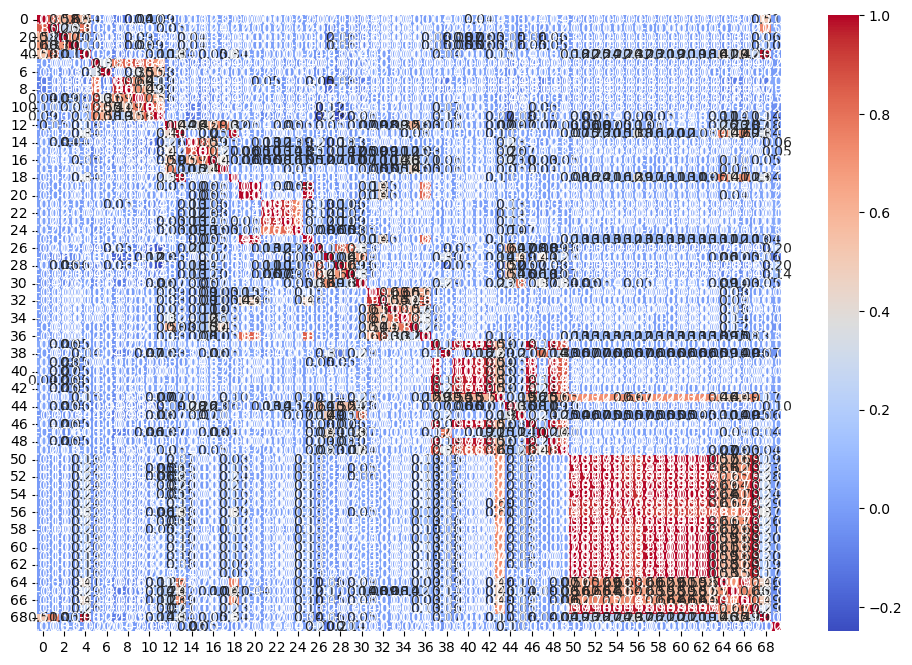

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando o heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [41]:
bartlett, p_value = calculate_bartlett_sphericity(df_padronizado)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

if p_value < 0.05:
    print('Rejeitamos a Hipótese Nula (A Matriz de correlação de Pearson não é igual a Matrix Identidade')
    print()
else:
    print('Não Rejeitamos a Hipótese (A Matriz de correlação de Pearson é igual a Matriz Identidade')
    print()

Bartlett statistic: 1144109.2436152732
p-value : 0.0
Rejeitamos a Hipótese Nula (A Matriz de correlação de Pearson não é igual a Matrix Identidade



In [42]:
def teste_kmo(dados):
    """ 
    Esta função realizar o calcula o KMO para verificar a adequação global da Análise Fatorial
    
    Entrada:
    dados: dadosframe
    
    Saida:
    
    kmo_model : float
    """
    kmo_all, kmo_model = calculate_kmo(dados)
    
    if 1.0 >= kmo_model >= 0.9:
        print("Adequação Global KMO: Muito Boa")
    elif 0.9 >= kmo_model >= 0.8:
        print('Adequação Global KMO: Boa')
    elif 0.8 >= kmo_model >= 0.7:
        print('Adequação Global KMO: Média')
    elif 0.7 >= kmo_model >= 0.6:
        print("Adequação Global KMO: Razoavél")
    elif 0.6 >= kmo_model >= 0.5:
        print("Adequação Global KMO: Má")
    else:
        print("Adequação Global KMO: Inaceitável") 
    print()
    
    return kmo_all, kmo_model

In [43]:
kmo_all, kmo_model = teste_kmo(df_padronizado)

print(kmo_model)

Adequação Global KMO: Média

0.7316264312202322


c:\Users\salas\anaconda3\envs\trader\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [44]:
import numpy as np 

# X = np.matrix(df_padronizado)
X = df_padronizado
S = np.cov(np.transpose(X))

In [45]:
X.shape

(5000, 70)

In [46]:
X = np.asarray(X)

X.shape

(5000, 70)

In [47]:
np.diagonal(S)

array([1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004,
       1.00020004, 1.00020004, 1.00020004, 1.00020004, 1.00020004])

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

In [49]:
pca

PCA(n_components=20)

In [50]:
pca.fit(X)

PCA(n_components=20)

In [51]:
# Pesos das componentes principais

pca.components_[0,:]

array([ 0.00276311,  0.00916311, -0.00227246, -0.00287707,  0.07181239,
       -0.00864132, -0.00203881, -0.01216824, -0.01150913, -0.01137292,
       -0.00652713,  0.01465828,  0.02689574,  0.06350423, -0.00128007,
        0.00137829,  0.00558882,  0.00470557,  0.06573323,  0.00749155,
        0.00898868, -0.00194016, -0.0011993 ,  0.0002942 ,  0.00435721,
        0.03827161, -0.00705861,  0.00928216, -0.0096006 , -0.00726807,
        0.01794828,  0.00401286,  0.00670191,  0.00248704,  0.00421092,
        0.00447229,  0.03784426,  0.01310403,  0.02532088,  0.0103385 ,
        0.01111893,  0.01219018,  0.01330735,  0.18290672, -0.0009069 ,
        0.02059785,  0.01151101,  0.00980749,  0.01121471,  0.02268999,
        0.23426425,  0.23889961,  0.23946783,  0.24051051,  0.23899246,
        0.23408383,  0.23603783,  0.23979725,  0.23645277,  0.23581906,
        0.23708032,  0.23578708,  0.23519816,  0.23196825,  0.17875672,
        0.16684353,  0.19100705,  0.24038721,  0.07866397, -0.00

In [52]:
# valores_medios = pd.DataFrame(df.mean()).rename(columns={0:'Media'})

# valores_medios.sort_values(by='Media', ascending=True)

# valores_medios[valores_medios['Media'] <=1.0]

In [53]:
# 3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?

# Variância das componentes principais

pca.explained_variance_ratio_

np.round(pca.explained_variance_ratio_,2)

array([0.24, 0.12, 0.07, 0.07, 0.06, 0.06, 0.05, 0.05, 0.04, 0.04, 0.03,
       0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01])

In [54]:

pca.explained_variance_ratio_.cumsum()

array([0.243336  , 0.35987035, 0.43309852, 0.50060638, 0.55821702,
       0.61477988, 0.66417996, 0.71059847, 0.75334053, 0.79161274,
       0.82479267, 0.84685408, 0.86822992, 0.8869503 , 0.90461714,
       0.91823647, 0.92819142, 0.93711192, 0.94464712, 0.95105236])

In [55]:
import numpy as np

# Proporção de variância explicada acumulada
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance_cumulative)

[0.243336   0.35987035 0.43309852 0.50060638 0.55821702 0.61477988
 0.66417996 0.71059847 0.75334053 0.79161274 0.82479267 0.84685408
 0.86822992 0.8869503  0.90461714 0.91823647 0.92819142 0.93711192
 0.94464712 0.95105236]


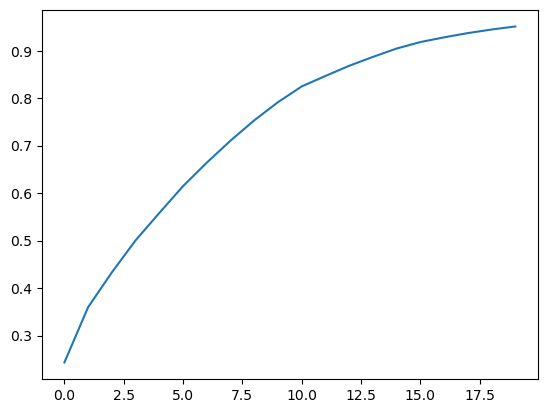

In [56]:
plt.plot(explained_variance_cumulative)

In [57]:
# Exibir a proporção de variância explicada por cada componente
print("Variância explicada por componente:", pca.explained_variance_ratio_)

Variância explicada por componente: [0.243336   0.11653436 0.07322816 0.06750787 0.05761064 0.05656286
 0.04940007 0.04641851 0.04274206 0.03827221 0.03317992 0.02206141
 0.02137584 0.01872038 0.01766685 0.01361932 0.00995496 0.0089205
 0.00753519 0.00640525]


<Axes: >

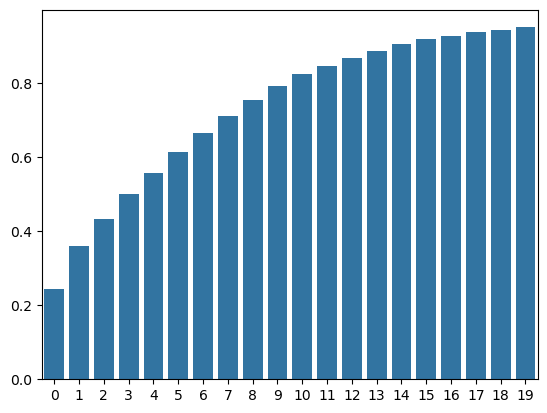

In [60]:
sns.barplot(pca.explained_variance_ratio_.cumsum())

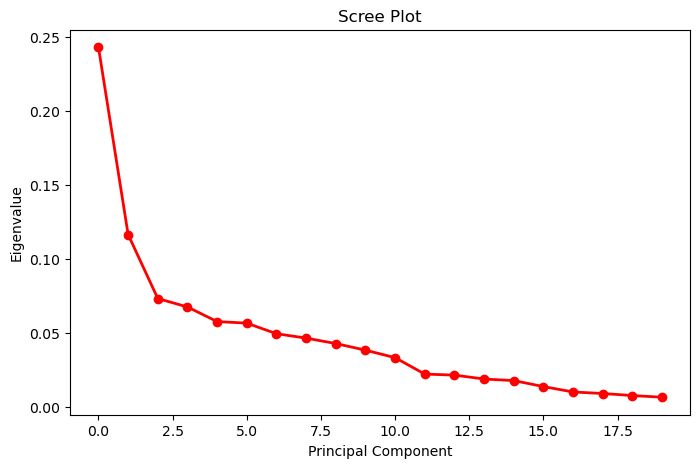

In [25]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

In [26]:
pca.transform(X)

array([[ 0.09725181, -0.74557447, -0.92268655, ..., -0.03850962,
         0.02021215,  0.12688672],
       [-0.07343189,  0.05770287,  0.74371779, ..., -0.19583231,
        -0.8334339 ,  0.09485049],
       [-0.05845733,  1.47115473, -1.9748745 , ...,  0.06528075,
         0.24575942,  0.06274767],
       ...,
       [-0.19864858, -0.21321498,  0.23071957, ..., -0.06418012,
        -0.16028349,  0.053671  ],
       [ 0.05483939,  0.21620411,  0.11624207, ...,  0.03938489,
         0.24063896, -0.08575892],
       [-0.06349698,  1.57660566,  4.59482832, ...,  0.25283795,
         2.36792836, -1.01449324]])

In [27]:
# Vamos considerar 2 componentes principais

pca = PCA(n_components=2)
pca.fit(X)

pca.components_

array([[ 2.76311066e-03,  9.16310805e-03, -2.27246214e-03,
        -2.87707244e-03,  7.18123928e-02, -8.64131553e-03,
        -2.03881436e-03, -1.21682372e-02, -1.15091335e-02,
        -1.13729161e-02, -6.52713081e-03,  1.46582815e-02,
         2.68957429e-02,  6.35042313e-02, -1.28007377e-03,
         1.37829131e-03,  5.58881573e-03,  4.70557011e-03,
         6.57332331e-02,  7.49155314e-03,  8.98867676e-03,
        -1.94015740e-03, -1.19930431e-03,  2.94204702e-04,
         4.35720844e-03,  3.82716098e-02, -7.05861031e-03,
         9.28215876e-03, -9.60060520e-03, -7.26807377e-03,
         1.79482789e-02,  4.01285664e-03,  6.70190706e-03,
         2.48704145e-03,  4.21091718e-03,  4.47229436e-03,
         3.78442603e-02,  1.31040301e-02,  2.53208773e-02,
         1.03385006e-02,  1.11189278e-02,  1.21901836e-02,
         1.33073532e-02,  1.82906718e-01, -9.06901715e-04,
         2.05978498e-02,  1.15110131e-02,  9.80748603e-03,
         1.12147070e-02,  2.26899897e-02,  2.34264253e-0

In [28]:
np.round(pca.components_[0],3)

array([ 0.003,  0.009, -0.002, -0.003,  0.072, -0.009, -0.002, -0.012,
       -0.012, -0.011, -0.007,  0.015,  0.027,  0.064, -0.001,  0.001,
        0.006,  0.005,  0.066,  0.007,  0.009, -0.002, -0.001,  0.   ,
        0.004,  0.038, -0.007,  0.009, -0.01 , -0.007,  0.018,  0.004,
        0.007,  0.002,  0.004,  0.004,  0.038,  0.013,  0.025,  0.01 ,
        0.011,  0.012,  0.013,  0.183, -0.001,  0.021,  0.012,  0.01 ,
        0.011,  0.023,  0.234,  0.239,  0.239,  0.241,  0.239,  0.234,
        0.236,  0.24 ,  0.236,  0.236,  0.237,  0.236,  0.235,  0.232,
        0.179,  0.167,  0.191,  0.24 ,  0.079, -0.001])

In [29]:
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]

In [30]:
df['PCA1'] = PCA1
df['PCA2'] = PCA2

In [31]:
df.head()

,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_50,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,...,leads_imovel_casa,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj,PCA1,PCA2
0,72.0400000000,157.9100000000,2.0000000000,79.0000000000,615.0000000000,13893.1700000000,10104.5600000000,4612.0000000000,6446.0000000000,13209.0000000000,...,3.0000000000,9.0000000000,6.0000000000,1.0000000000,9.0000000000,24.0000000000,1754.0000000000,17.0000000000,0.0972518113,-0.7455743465
1,147.4500000000,462.8600000000,0.0000000000,17.0000000000,1542.0000000000,11569.3300000000,17968.0800000000,841.0000000000,841.0000000000,1554.0000000000,...,0.0000000000,4.0000000000,1.0000000000,1.0000000000,8.0000000000,11.0000000000,1643.0000000000,17.0000000000,-0.0734318970,0.0577024712
2,8.6000000000,9.7100000000,7.0000000000,13.0000000000,23.0000000000,20898.6700000000,10081.9400000000,13209.0000000000,13209.0000000000,17174.0000000000,...,0.0000000000,1.0000000000,3.0000000000,1.0000000000,4.0000000000,5.0000000000,63.0000000000,17.0000000000,-0.0584573316,1.4711543203
3,172.2000000000,295.9700000000,34.0000000000,273.0000000000,912.0000000000,8651.1700000000,5820.7600000000,1554.0000000000,4612.0000000000,9605.0000000000,...,8.0000000000,3.0000000000,2.0000000000,1.0000000000,5.0000000000,10.0000000000,1742.0000000000,17.0000000000,0.1892401145,0.9516366749
4,0.6700000000,1.1500000000,0.0000000000,2.0000000000,2.0000000000,32313.0000000000,9489.0733293839,32313.0000000000,32313.0000000000,32313.0000000000,...,3.0000000000,1.0000000000,2.0000000000,1.0000000000,1.0000000000,3.0000000000,19.0000000000,17.0000000000,-0.3236832816,-0.7005876700


In [32]:
df.sort_values(by='PCA1',ascending=False)

,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_50,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,...,leads_imovel_casa,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj,PCA1,PCA2
4038,5.3100000000,441.7600000000,0.0000000000,0.0000000000,39967.0000000000,2693.8900000000,6368.0100000000,0.0000000000,18.0000000000,179.0000000000,...,6628.0000000000,20733.0000000000,818.0000000000,27.0000000000,1609.0000000000,33879.0000000000,45410.0000000000,18.0000000000,276.3128662143,-11.1944084311
207,14.8900000000,1116.3100000000,0.0000000000,0.0000000000,90214.0000000000,2427.4700000000,6095.1100000000,0.0000000000,6.0000000000,122.0000000000,...,503.0000000000,607.0000000000,1230.0000000000,21.0000000000,1983.0000000000,7398.0000000000,99100.0000000000,17.0000000000,73.9495824478,-2.8682996937
18,18.2900000000,889.6200000000,0.0000000000,1.0000000000,53690.0000000000,2751.5000000000,6437.0400000000,0.0000000000,17.0000000000,179.0000000000,...,270.0000000000,320.0000000000,425.0000000000,16.0000000000,1114.0000000000,7728.0000000000,99100.0000000000,17.0000000000,44.6067862903,-2.4095076873
4058,709.5000000000,1003.3800000000,1419.0000000000,1419.0000000000,1419.0000000000,9003.5000000000,11554.8300000000,833.0000000000,833.0000000000,17174.0000000000,...,0.0000000000,0.0000000000,1.0000000000,1.0000000000,2.0000000000,6.0000000000,1437.0000000000,18.0000000000,13.8582945202,190.5354130764
3124,0.6400000000,7.0500000000,0.0000000000,0.0000000000,158.0000000000,11398.6700000000,12296.4700000000,0.0000000000,2007.0000000000,9605.0000000000,...,97.0000000000,117.0000000000,248.0000000000,1.0000000000,174.0000000000,637.0000000000,530.0000000000,18.0000000000,9.0675406705,-0.3119628894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0.0000000000,287.5870084594,0.0000000000,0.0000000000,0.0000000000,37444.0000000000,9489.0733293839,37444.0000000000,37444.0000000000,37444.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,18.0000000000,18.0000000000,-0.6346690470,-0.2910725597
3545,0.0000000000,287.5870084594,0.0000000000,0.0000000000,0.0000000000,37444.0000000000,9489.0733293839,37444.0000000000,37444.0000000000,37444.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,18.0000000000,18.0000000000,-0.6346690470,-0.2910725597
3546,0.0000000000,287.5870084594,0.0000000000,0.0000000000,0.0000000000,37444.0000000000,9489.0733293839,37444.0000000000,37444.0000000000,37444.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,18.0000000000,18.0000000000,-0.6346690470,-0.2910725597
3548,0.0000000000,287.5870084594,0.0000000000,0.0000000000,0.0000000000,37444.0000000000,9489.0733293839,37444.0000000000,37444.0000000000,37444.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,18.0000000000,18.0000000000,-0.6346690470,-0.2910725597
